<a href="https://colab.research.google.com/github/AnD2289/Advanced-Machine-Learning/blob/master/Cartpole_QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

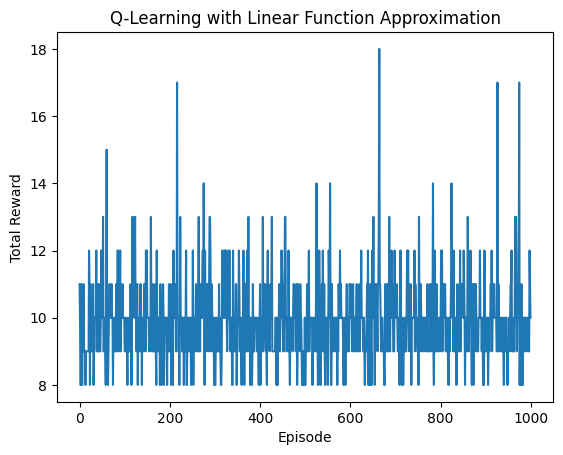

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Fourier basis features
def fourier_basis(state, num_bases):
    state = np.array(state)
    basis = []
    for i in range(num_bases):
        angle = np.pi * i * state / 2
        basis.extend(np.cos(angle))
    return np.array(basis)

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon-greedy exploration
num_episodes = 1000

# Fourier basis parameters
num_bases = 20

# Initialize Q-table
env = gym.make('CartPole-v1')
state_dim = len(fourier_basis(env.reset(), num_bases))
action_dim = env.action_space.n
Q = np.zeros((state_dim, action_dim))

# Lists to store rewards for plotting
episode_rewards = []

def state_to_index(state_basis):
    return np.argmax(state_basis.dot(np.arange(state_dim)))

# Lists to store performance variables
episode_rewards = []
episode_lengths = []
q_value_changes = []

# Function to compute Q-value changes
def compute_q_value_change(Q, prev_Q):
    return np.mean(np.abs(Q - prev_Q))

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Select action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            state_basis = fourier_basis(state, num_bases)
            state_index = state_to_index(state_basis)
            action = np.argmax(Q[state_index, :])

        # Take the chosen action
        next_state, reward, done, _ = env.step(action)

        # Update Q-value using Q-learning
        next_state_basis = fourier_basis(next_state, num_bases)
        next_state_index = state_to_index(next_state_basis)
        Q[state_index, action] += alpha * (reward + gamma * np.max(Q[next_state_index, :]) - Q[state_index, action])

        state = next_state
        total_reward += reward

    # Track performance metrics
    episode_rewards.append(total_reward)
    episode_lengths.append(time_steps)

    if episode > 0:
        q_change = compute_q_value_change(Q, prev_Q)
        q_value_changes.append(q_change)

    prev_Q = np.copy(Q)  # Make a copy of Q-values for the next iteration

env.close()

# Plot the rewards per episode
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning with Linear Function Approximation')
plt.show()


In [ ]:
# Plot performance metrics
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(episode_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(132)
plt.plot(episode_lengths)
plt.title("Episode Lengths")
plt.xlabel("Episode")
plt.ylabel("Length")

plt.subplot(133)
plt.plot(q_value_changes)
plt.title("Q-Value Changes")
plt.xlabel("Episode")
plt.ylabel("Q-Value Change")

plt.tight_layout()
plt.show()

In [ ]:
!pip install pyglet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 854.7/854.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
def run_policy_with_learned_Q(Q, num_bases):
    env = gym.make('CartPole-v1',render_mode='human')
    episode_reward = 0

    for _ in range(10):  # Run for a fixed number of episodes
        state = env.reset()
        done = False

        while not done:
            state_basis = fourier_basis(state, num_bases)
            action = np.argmax(Q[state_to_index(state_basis), :])
            state, reward, done, _ = env.step(action)
            episode_reward += reward
            env.render()  # Render the environment (you may need to adjust this)

    env.close()
    return episode_reward

# Assuming you have the Q-table (Q) and num_bases learned from Q-learning
total_reward = run_policy_with_learned_Q(Q, num_bases)
print("Total reward from the learned policy:", total_reward)


Total reward from the learned policy: 91.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


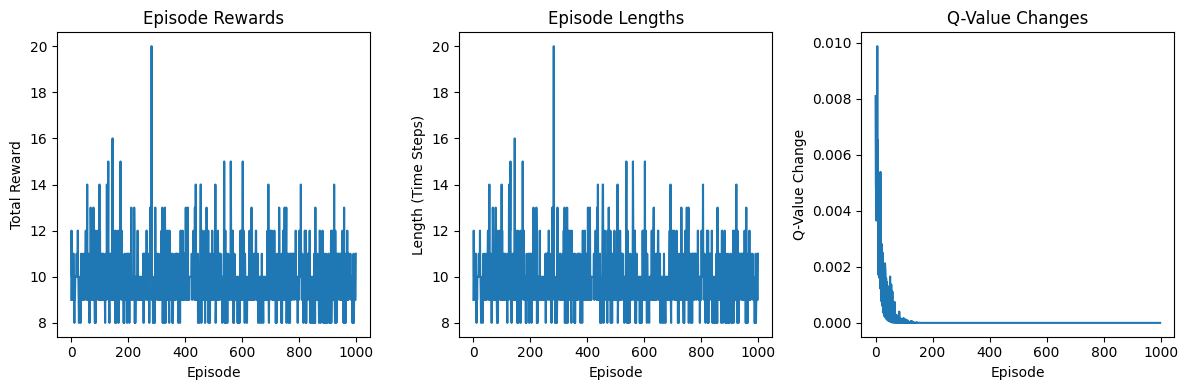

In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Fourier basis features
def fourier_basis(state, num_bases):
    state = np.array(state)
    basis = []
    for i in range(num_bases):
        angle = np.pi * i * state / 2
        basis.extend(np.cos(angle))
    return np.array(basis)

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon-greedy exploration
num_episodes = 1000

# Fourier basis parameters
num_bases = 20

# Initialize Q-table
env = gym.make('CartPole-v1', render_mode='human', new_step_api=True)
state_dim = len(fourier_basis(env.reset(), num_bases))
action_dim = env.action_space.n
Q = np.zeros((state_dim, action_dim))

# Lists to store performance variables
episode_rewards = []
episode_lengths = []
q_value_changes = []

def state_to_index(state_basis):
    return np.argmax(state_basis.dot(np.arange(state_dim)))

# Function to compute Q-value changes
def compute_q_value_change(Q, prev_Q):
    return np.mean(np.abs(Q - prev_Q))

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    time_steps = 0  # Initialize time steps for the current episode
    done = False

    while not done:
        # Select action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            state_basis = fourier_basis(state, num_bases)
            state_index = state_to_index(state_basis)
            action = np.argmax(Q[state_index, :])

        # Take the chosen action
        next_state, reward, done, info, _= env.step(action)

        # Update Q-value using Q-learning
        next_state_basis = fourier_basis(next_state, num_bases)
        next_state_index = state_to_index(next_state_basis)
        Q[state_index, action] += alpha * (reward + gamma * np.max(Q[next_state_index, :]) - Q[state_index, action])

        state = next_state
        total_reward += reward
        time_steps += 1  # Increment time steps

    episode_rewards.append(total_reward)
    episode_lengths.append(time_steps)

    if episode > 0:
        q_change = compute_q_value_change(Q, prev_Q)
        q_value_changes.append(q_change)

    prev_Q = np.copy(Q)  # Make a copy of Q-values for the next iteration

env.close()

# Plot performance metrics
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(episode_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(132)
plt.plot(episode_lengths)
plt.title("Episode Lengths")
plt.xlabel("Episode")
plt.ylabel("Length (Time Steps)")

plt.subplot(133)
plt.plot(q_value_changes)
plt.title("Q-Value Changes")
plt.xlabel("Episode")
plt.ylabel("Q-Value Change")
plt.set_xlim(5000, 0)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


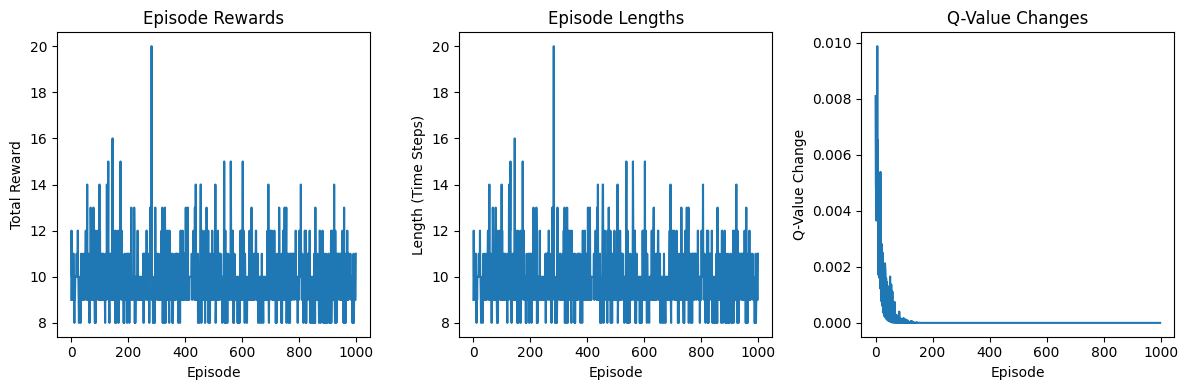

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Fourier basis features
def fourier_basis(state, num_bases):
    state = np.array(state)
    basis = []
    for i in range(num_bases):
        angle = np.pi * i * state / 2
        basis.extend(np.cos(angle))
    return np.array(basis)

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon-greedy exploration
num_episodes = 1000

# Fourier basis parameters
num_bases = 20

# Initialize Q-table
env = gym.make('CartPole-v1', render_mode='human', new_step_api=True)
state_dim = len(fourier_basis(env.reset(), num_bases))
action_dim = env.action_space.n
Q = np.zeros((state_dim, action_dim))

# Lists to store performance variables
episode_rewards = []
episode_lengths = []
q_value_changes = []

def state_to_index(state_basis):
    return np.argmax(state_basis.dot(np.arange(state_dim)))

# Function to compute Q-value changes
def compute_q_value_change(Q, prev_Q):
    return np.mean(np.abs(Q - prev_Q))

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    time_steps = 0  # Initialize time steps for the current episode
    done = False

    while not done:
        # Select action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            state_basis = fourier_basis(state, num_bases)
            state_index = state_to_index(state_basis)
            action = np.argmax(Q[state_index, :])

        # Take the chosen action
        next_state, reward, done, info, _= env.step(action)

        # Update Q-value using Q-learning
        next_state_basis = fourier_basis(next_state, num_bases)
        next_state_index = state_to_index(next_state_basis)
        Q[state_index, action] += alpha * (reward + gamma * np.max(Q[next_state_index, :]) - Q[state_index, action])

        state = next_state
        total_reward += reward
        time_steps += 1  # Increment time steps

    episode_rewards.append(total_reward)
    episode_lengths.append(time_steps)

    if episode > 0:
        q_change = compute_q_value_change(Q, prev_Q)
        q_value_changes.append(q_change)

    prev_Q = np.copy(Q)  # Make a copy of Q-values for the next iteration

env.close()




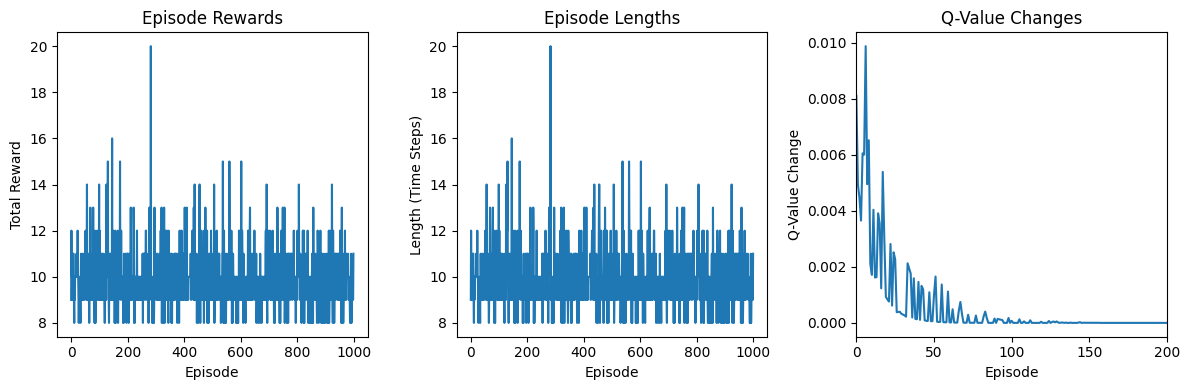

In [14]:
# Plot performance metrics
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(episode_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(132)
plt.plot(episode_lengths)
plt.title("Episode Lengths")
plt.xlabel("Episode")
plt.ylabel("Length (Time Steps)")

plt.subplot(133)
plt.plot(q_value_changes)
plt.title("Q-Value Changes")
plt.xlabel("Episode")
plt.ylabel("Q-Value Change")
plt.xlim(0, 200)  # Adjust the limits as needed
plt.tight_layout()
plt.show()


In [7]:
print(env.step(action))

(array([ 0.02636962,  0.35418582, -0.01932721, -0.5479242 ], dtype=float32), 1.0, False, False, {})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
